In [3]:
import pandas as pd

In [4]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [46]:
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

Aus_Job = df[df.job_country == 'Australia']
aus_jobs = Aus_Job[Aus_Job.salary_year_avg.notna()]

In [60]:
Aus_Job = df[df.job_country == 'Australia']
aus_jobs = Aus_Job[Aus_Job.salary_year_avg.notna()]

In [8]:
median_Salary_year  = df['salary_year_avg'].median()
median_Salary_hourly  = df['salary_hour_avg'].median()

In [9]:
df_filled = df

df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_Salary_year)
df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(median_Salary_hourly)

In [10]:
df_filled.loc[:,'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
...,...,...
785736,115000.0,45.98
785737,115000.0,45.98
785738,115000.0,45.98
785739,115000.0,45.98


In [11]:
df_unique = df_filled

df_unique = df_unique.drop_duplicates()

In [12]:
df_unique = df_unique.drop_duplicates(subset = ['job_title','company_name'] )

In [ ]:
df_unique

In [47]:
df_salary_job_country = df.pivot_table(values = 'salary_year_avg',index = 'job_country',columns = 'job_title_short',aggfunc='median')

In [48]:
df_salary_job_country

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [49]:
top_countries = df['job_country'].value_counts().head(10).index

In [50]:
top10Countries = df_salary_job_country.loc[top_countries]

In [51]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

In [52]:
df_job_country_salary = top10Countries[job_titles]

In [53]:
df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0
Singapore,99500.0,98301.5,131560.0
Sudan,87500.0,127500.0,130000.0
Netherlands,93852.0,97444.0,157500.0


<Axes: xlabel='job_country'>

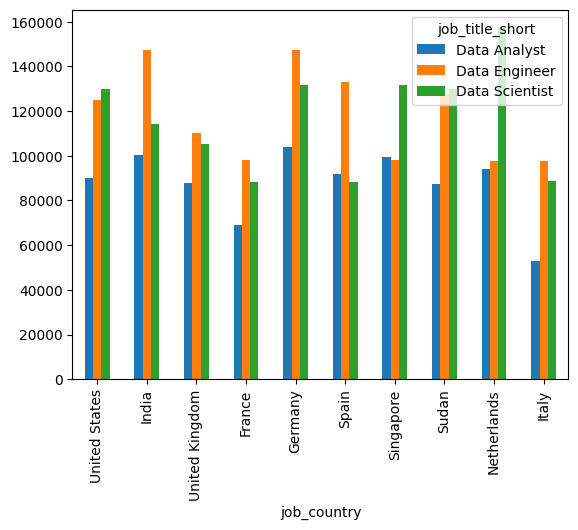

In [54]:
df_job_country_salary.plot(kind = 'bar')

In [75]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

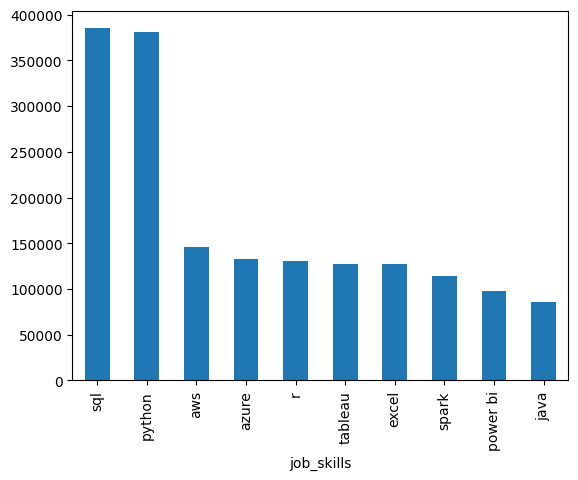

In [76]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [80]:
skillcounts = df_exploded.groupby(['job_title_short','job_skills']).size()

In [82]:
df_skills_count = skillcounts.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values(by= 'skill_count',ascending =False)

In [84]:
job_title = 'Data Analyst'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)

<Axes: ylabel='job_skills'>

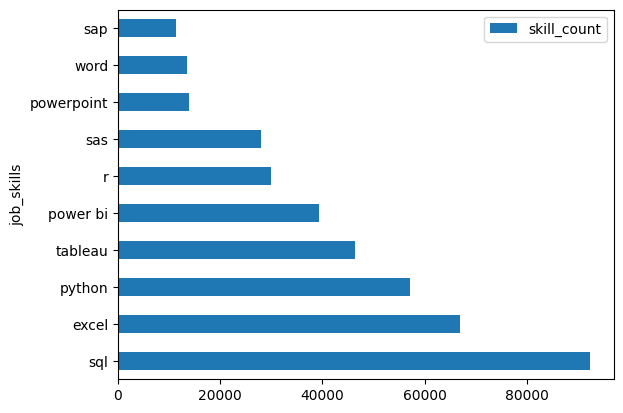

In [85]:
df_skill_final.plot(kind = 'barh',x= 'job_skills',y = 'skill_count')

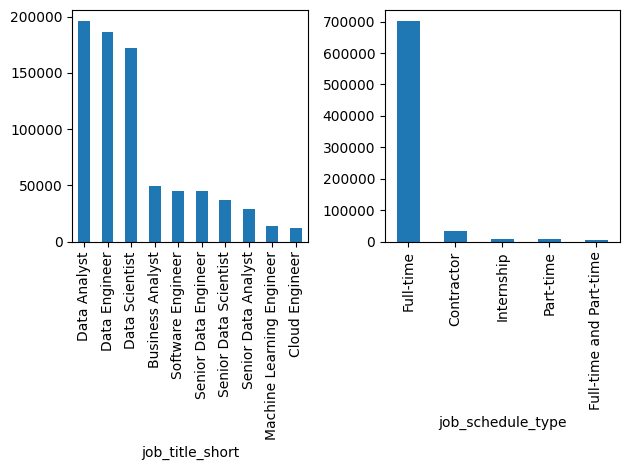

In [89]:
import matplotlib.pyplot as plt


fig,ax= plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind = 'bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(5).plot(kind = 'bar',ax=ax[1])

fig.tight_layout()

In [91]:
df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [94]:
skills_stats = df_exploded.groupby('job_skills').agg(skill_count = ('job_skills','count'),median_salary=('salary_year_avg','median'))
skills_stats = skills_stats.sort_values(by= 'skill_count',ascending = False).head(10)

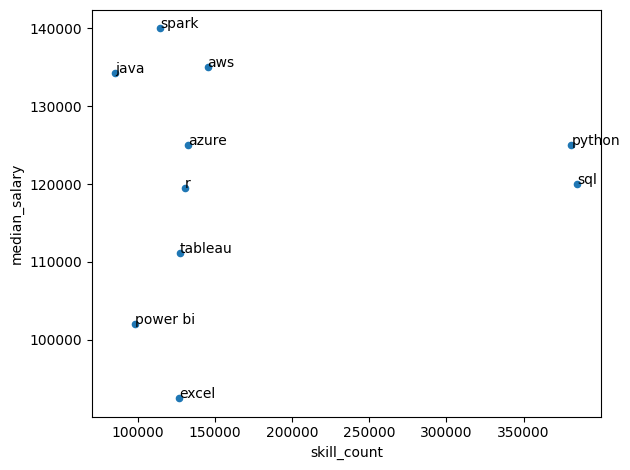

In [97]:
skills_stats.plot(kind = 'scatter',x='skill_count',y='median_salary')

for i,txt in enumerate(skills_stats.index):
  plt.text(skills_stats['skill_count'].iloc[i],skills_stats['median_salary'].iloc[i],txt)
  plt.tight_layout()

In [ ]:
df_exploded